## MANE 6962
## Leslie Aleman
## RIN: 661974300

In [1]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

tf


### Question 1

In [3]:
import numpy as np
from numpy import linalg as LA
x1 = np.array([2,3,4,8,9])
x2 = np.array([2,-3,-4,89])
print("a) Number of features in vector x1:",len(x1))
print("   Number of features in vector x2:",len(x2))

a) Number of features in vector x1: 5
   Number of features in vector x2: 4


In [5]:
L1_norm = LA.norm(x1,1) #1-Norm or Manhattan vector norm
L2_norm = LA.norm(x1,2) #2-Norm or Euclidean vector norm
Linf_norm = LA.norm(x1,np.inf) #Max-norm or infinity-norm
print("b) Norms for vector x1")
print('   L1 = %.2f, L2 = %.2f, L_inf = %.2f' %(L1_norm, L2_norm, Linf_norm))

L1_norm = LA.norm(x2,1) #Manhattan norm
L2_norm = LA.norm(x2,2) #Euclidean norm
Linf_norm = LA.norm(x2,np.inf) #infinity norm
print("   Norms for vector x2")
print('   L1 = %.2f, L2 = %.2f, L_inf = %.2f' %(L1_norm, L2_norm, Linf_norm))

b) Norms for vector x1
   L1 = 26.00, L2 = 13.19, L_inf = 9.00
   Norms for vector x2
   L1 = 98.00, L2 = 89.16, L_inf = 89.00


### Question 2

In [59]:
# A color image has the shape in the form of (H, W, C) 
# which stands for H:height, W:width and C:channel. 
# For example, an RGB image of size 256x256 has the shape of (256, 256, 3) 
# and it contains 256*256*3 number of elements in total.

# y = Wx + b; dimensions of y, W*x, and b should match

image1 = np.zeros((1024,1024,3))
flat1 = np.reshape(image1,-1) #flatten into 1d array , x
print("a) Length of the feature vector, x:",len(flat1))

image2 = np.zeros((64,64,3))
flat2 = np.reshape(image2,-1) # y
print("b) Length of the output vector, y:",len(flat2))

W = len(flat2)*len(flat1)# dimensions are y by x
print("c) Number of elements in matrix, W : {:.3E}".format(W))
print("   Number of elements in vector, b :",len(flat2))

a) Length of the feature vector, x: 3145728
b) Length of the output vector, y: 12288
c) Number of elements in matrix, W : 3.865E+10
   Number of elements in vector, b : 12288


### Question 3

In [51]:
W = np.array([[1,-1],[2,0]])
W

array([[ 1, -1],
       [ 2,  0]])

In [85]:
L1_norm = LA.norm(W,1) #1-Norm
L2_norm = LA.norm(W,2) #2-norm
Linf_norm = LA.norm(W,np.inf) #infinity norm
fro_norm = LA.norm(W,'fro') #Frobenius norm
print('1-norm= %.2f, 2-form = %.2f, infinity-norm = %.2f, Frobenius norm = %.2f' 
      %(L1_norm, L2_norm, Linf_norm, fro_norm))

1-norm= 3.00, 2-form = 2.29, infinity-norm = 2.00, Frobenius norm = 2.45


### Question 4

In [53]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [54]:
X = iris.data[:, :3] # select first three features
y = iris.target
print(X.shape)
print(y.shape)

(150, 3)
(150,)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.2,
                                                  random_state=123,shuffle=True,
                                                  stratify=y)
clf = svm.SVC()
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [56]:
param_grid={
            'C': [10,20,50,100,200],
            'gamma': ['auto','scale'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree' : [3,4,5,6], 
            'coef0' : [0.01,0.0,0.1,0.2]} 

grid = RandomizedSearchCV(clf,param_grid,n_jobs=-1,cv=5, verbose=2,
                          scoring='accuracy',random_state=0)
grid.fit(X_train,y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))
#clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'linear', 'gamma': 'auto', 'degree': 5, 'coef0': 0.0, 'C': 10}
Accuracy:0.975


In [57]:
from sklearn.metrics import accuracy_score
preds = grid.predict(X_test)
acc = accuracy_score(y_test,preds)
print('Accuracy score :', acc)

Accuracy score : 0.9333333333333333


### Question 5

In [58]:
#A machine learning program for finding the 7th root of an integer
#using a deep neural network.
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


In [59]:
import math
#Load dataset
#define input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81], [100]])
X = X*1.0
y = [math.pow(i,1/7) for i in X]
y = np.asarray(y).reshape(10,1)
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [60]:
#define keras model (neural network)
model = Sequential()
#first hidden layer with 6 neurons and input dim of 1
model.add(Dense(6,input_dim=X.shape[1],activation='relu')) 
model.add(Dense(6,activation='relu')) #second hidden layer with 6 units
model.add(Dense(6,activation='relu')) #third hidden layer with 
model.add(Dense(1)) #output layer

In [61]:
#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

In [62]:
#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0) # model is trying to learn here
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 12        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [63]:
#make class predictions with the model
predictions = model.predict(X)

1/1 [==============================] - 0s 39ms/step


In [64]:
#summarize the first 10 cases
for i in range(X.shape[0]):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]))

[1.0] => 1.00 (expected 1.00)
[4.0] => 1.31 (expected 1.22)
[9.0] => 1.37 (expected 1.37)
[16.0] => 1.46 (expected 1.49)
[25.0] => 1.57 (expected 1.58)
[36.0] => 1.63 (expected 1.67)
[49.0] => 1.70 (expected 1.74)
[64.0] => 1.78 (expected 1.81)
[81.0] => 1.88 (expected 1.87)
[100.0] => 1.98 (expected 1.93)


4/4 [==============================] - 0s 1ms/step


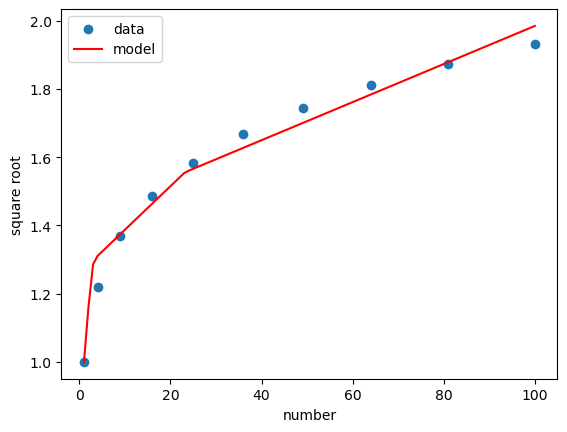

In [66]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)),
         color='red', label='model')
plt.xlabel('number')
plt.ylabel('square root')
plt.legend()

### Question 6

In [67]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [68]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
iris.data.shape 

(150, 4)

In [70]:
X = iris.data[:,0] #use sepal length as input
y = iris.data[:,2] #predicts petal length as output
print(X.shape)
print(y.shape)

(150,)
(150,)


In [71]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 random_state=123,shuffle=True,stratify=iris.target)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1))

In [72]:
X_train.shape

(120, 1)

In [73]:
X_train.shape[1:]

(1,)

In [74]:
#define keras model (neural network)
model = Sequential()
model.add(Dense(80,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))
#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

In [75]:
#fit the keras model on the training dataset (CPU)
#model is trying to learn here
model.fit(X_train,y_train,epochs=2000,batch_size=10, verbose=0) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                160       
                                                                 
 dense_17 (Dense)            (None, 40)                3240      
                                                                 
 dense_18 (Dense)            (None, 40)                1640      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [76]:
#evaluate the model
mse_test = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 96ms/step - loss: 11.7278


In [77]:
from sklearn.metrics import r2_score
#make predictions with the model on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred),
        r2_score(y_test, y_test_pred)))

1/1 [==============================] - 0s 16ms/step
R^2 train: 0.814, test: 0.886


In [83]:
#summarize the first 10 cases in the test subset
for i in range(10):
    print('%s => %.2f (expected %.2f)' 
          %(scaler.inverse_transform(X_test)[i].tolist(), y_test_pred[i], y_test[i]))

[5.5] => 3.48 (expected 3.80)
[4.8] => 1.75 (expected 1.40)
[6.7] => 5.26 (expected 5.70)
[6.5] => 5.09 (expected 5.10)
[4.4] => 1.22 (expected 1.30)
[4.7] => 1.48 (expected 1.30)
[7.7] => 6.56 (expected 6.10)
[6.3] => 5.12 (expected 4.90)
[6.0] => 4.64 (expected 4.80)
[4.9] => 1.95 (expected 1.50)


#### Same process but without scaling and dividing dataset into training and test subsets

In [79]:
#define keras model (neural network)
model = Sequential()
model.add(Dense(80,input_dim=1,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0) # model is trying to learn here
model.summary()

#make class predictions with the model
predictions = model.predict(X)
#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                160       
                                                                 
 dense_21 (Dense)            (None, 40)                3240      
                                                                 
 dense_22 (Dense)            (None, 40)                1640      
                                                                 
 dense_23 (Dense)            (None, 1)                 41        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step
5.1 => 1.94 (expected 1.40)
4.9 => 1.79 (expected 1.40)
4.7 => 1.60 (expected 1.30)
4.6 => 1.51 (expected 1.50)
5.0 => 1.87 (expected

In [80]:
from sklearn.metrics import r2_score
#make predictions with the model
print('R^2 whole dataset: %.3f' % r2_score(y,predictions))

R^2 whole dataset: 0.817
